In [23]:
import pandas as pd
import numpy as np
import datetime
from scipy import stats
import quandl
import matplotlib.pyplot as plt
%matplotlib inline
quandl.ApiConfig.api_key = '8bbPKo8xjyoors-yMfr-'

In [24]:
end = datetime.datetime.now()
start = end - datetime.timedelta(365)
AAPL = quandl.get('XNAS/AAPL')

In [25]:
AAPL

,Open,High,Low,Close,Volume,Adjustment Factor,Adjustment Type
Date,,,,,,,
2010-01-01,26.077332,26.077332,26.077332,26.077332,0.000000e+00,NaN,NaN
2010-01-04,26.410008,26.527496,26.270260,26.487921,3.813493e+07,NaN,NaN
2010-01-05,26.563361,26.662298,26.374144,26.512655,4.261566e+07,NaN,NaN
2010-01-06,26.510182,26.614066,26.063729,26.090936,4.698684e+07,NaN,NaN
2010-01-07,26.178743,26.218318,25.854724,26.042704,3.640412e+07,NaN,NaN
...,...,...,...,...,...,...,...
2018-12-25,143.924425,143.924425,143.924425,143.924425,0.000000e+00,NaN,NaN
2018-12-26,145.267314,154.118622,143.836206,154.059809,1.554654e+07,NaN,NaN
2018-12-27,153.040390,153.608912,147.100309,153.059994,1.462090e+07,NaN,NaN


In [26]:
rets_1 = (AAPL['Close']/AAPL['Close'].shift(1))-1

In [27]:
mean = np.mean(rets_1)
std = np.std(rets_1)
Z_99 = stats.norm.ppf(1-0.99)
price = AAPL.iloc[-1]['Close']
print(mean, std, Z_99, price)

0.0008868825666440934 0.01598176017325444 -2.3263478740408408 154.61853


In [28]:
ParamVAR = price*Z_99*std
HistVAR = price*np.percentile(rets_1.dropna(), 1)

print('Parametric VAR is {0:.3f} and Historical VAR is {1:.3f}'
      .format(ParamVAR, HistVAR))

Parametric VAR is -5.749 and Historical VAR is -6.748


In [29]:
np.random.seed(42)
n_sims = 1000000
sim_returns = np.random.normal(mean, std, n_sims)
SimVAR = price*np.percentile(sim_returns, 1)
print('Simulated VAR is ', SimVAR)

Simulated VAR is  -5.621133460311779


(array([4.50000e+01, 1.64900e+03, 2.25540e+04, 1.28541e+05, 3.17671e+05,
        3.39091e+05, 1.56728e+05, 3.09800e+04, 2.66200e+03, 7.90000e+01]),
 array([-0.07629601, -0.06109993, -0.04590386, -0.03070779, -0.01551171,
        -0.00031564,  0.01488043,  0.03007651,  0.04527258,  0.06046865,
         0.07566472]),
 <a list of 10 Patch objects>)

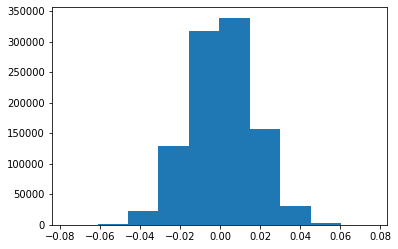

In [30]:
plt.hist(sim_returns)